In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

           
def convolution(X, F, b=0, s=1):
    w_out = (X.shape[0] - F.shape[0])//s + 1
    h_out = (X.shape[1] - F.shape[1])//s + 1
    z = np.zeros((h_out, w_out))
    for j in range(0, w_out, s):
        for i in range(0, h_out, s):
            z[i,j] = X[i:i+F.shape[1], j:j+F.shape[0]].flatten().dot(F.flatten()) + b
    return z

def max_pool(X, k, s):
    h_out = (X.shape[0] - k)//s + 1
    w_out = (X.shape[1] - k)//s + 1
    z = np.zeros((h_out, w_out))
    idx = []
    for j in range(0, h_out):
        for i in range(0, w_out):
            block = X[j*k:j*k+k, i*k:i*k+k]
            z[j,i] = np.max(block)
            index = np.add(np.unravel_index(block.argmax(), block.shape), (j*k, i*k))
            idx.append(index) # Save indices of max values for backward pass!
    return z, idx

def ReLU(x):
    return abs(x) * (x > 0) # abs just makes -0.0 into 0.0 for easier reading
def sigmoid(x):
    y = np.exp(x)
    return y / (1 + y)
def bce_loss(y, p):
    # Binary cross-entropy loss function
    return -(y * np.log10(p) + (1-y) * np.log10(1-p))

## Mobilenet
 Mobilenet is a fast and effficient CNN used in image classification. One of the key elements  of Mobilenet is the use of depthwise separable convolution to reduce the amount of calculations done.

Depthwise separable convolution consists of two parts. First is depthwise convolution followed by pointwise convolution. In depthwise convolution a 2-d depth filter is applied at each depth level of the input tensor as illustrated below

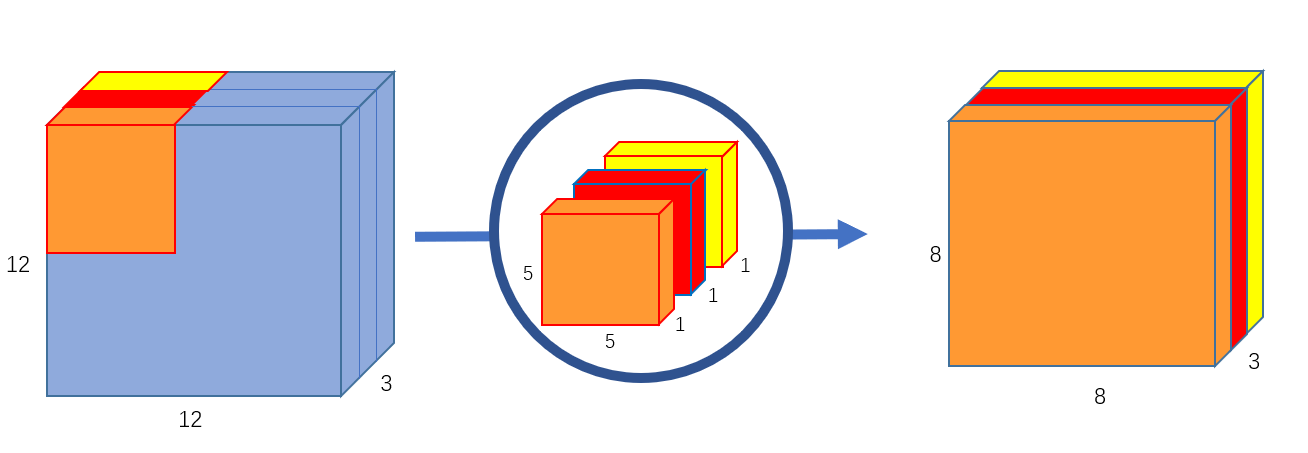

At pointwise convolution the different layers are combined by multiplying with a 1x1xm kernel (where m is number of layers). At this stage the layers are combined as showed in the picture:

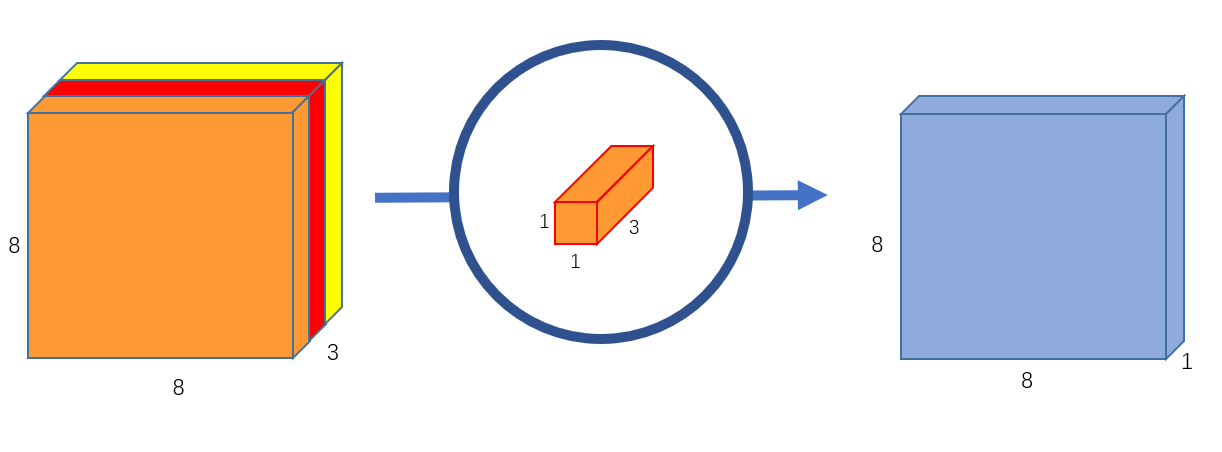


##### Task 1a)
Given an image with 10x10 pixels and each pixel containing an rgb value (depth of 3). What should be the kernel size if the output should be of shape 6x6x200 when applying normal 2D convolution? And how many multiplications are required? Assume stride is 1 and padding is 0


##### Task 1b)

Find how many multiplications are needed when applying depthwise separation.

##### Task 2a)

implement the code for depthwise convolution

#### Task 2b)

implement the code for pointwise convolution

#### Task 2c)

implement the model shown in the figure below with the implemented code from a) and b) and finally calculate the binary cross entropy loss for the first forward pass

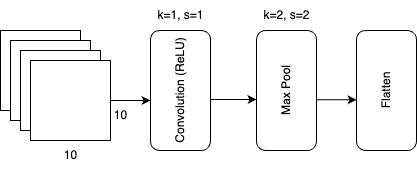

In [11]:
np.random.seed(0)
input_tensor = np.random.uniform(0, 1, (4, 10, 10))


pointwise_kernel = np.random.uniform(-1, 1, 4)


# TODO
def pointwise_convolution(data, kernel):
    pass

depthwise_kernel = np.random.uniform(-0.5, 0.5, (3, 3)) # Kernel


# TODO
def depthwise_collection(data, kernel, b=1, s=1):
    pass


depthwise_conv = depthwise_collection(input_tensor, depthwise_kernel)
pointwise_conv = pointwise_convolution(depthwise_conv, pointwise_kernel)
    

#a1 = ReLU(pointwise_conv)